# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

In [16]:
import pandas as pd
import numpy as np
import plotly.express as px
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})
~~~~

In [5]:
# Your code here. 
student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})

student_data.head()

,Age,Tardies
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4


Draw a dispersion diagram (scatter plot) for the data.

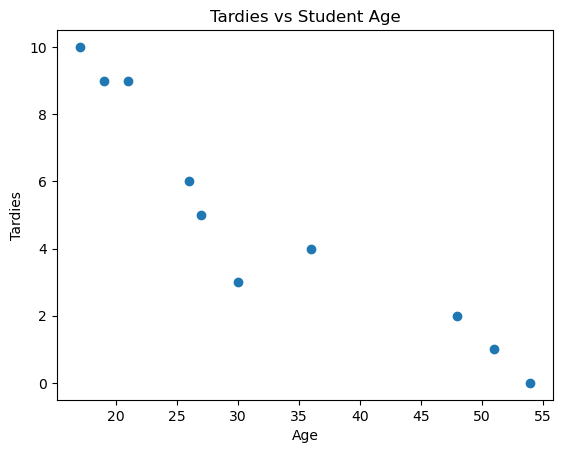

In [7]:
# Your code here
plt.scatter(student_data['Age'], student_data['Tardies'])
plt.title('Tardies vs Student Age')
plt.xlabel('Age')
plt.ylabel('Tardies')
plt.show()

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

*your explanation here*
It appears as if the older the student is, the less tardies it accumulates. Younger student seem to have more tardies than their older counterparts.

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [12]:
# your code here
covariance = student_data['Age'].cov(student_data['Tardies'])
print(f'Covariance: {covariance}')

correlation = student_data['Age'].corr(student_data['Tardies'])
print(f'Correlation: {correlation}')

# Theres a negative covariance which indicates that as the age increases, the tardines decreases.
# Correlation is also negative which means both variables are colsely but inversly related.

Covariance: -45.56666666666666
Correlation: -0.9391626886887122


Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [20]:
# your explanation here
# For this excersiose Ill use linear regression.

# Variables
x = student_data[['Age']]
y = student_data[['Tardies']]

# model
model = LinearRegression()
model.fit(x,y)

# model predictions
y_predictions = model.predict(x)

# Evaluate the model
slope = model.coef_[0]
intercept = model.intercept_

# mean squared error
mse = mean_squared_error(y, y_predictions)
r2 = r2_score(y, y_predictions)

print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")

Slope: [-0.24282077]
Intercept: [12.88880336]
Mean Squared Error (MSE): 1.3319201847356268
R² Score: 0.8820265558250109


Plot your regression model on your scatter plot.

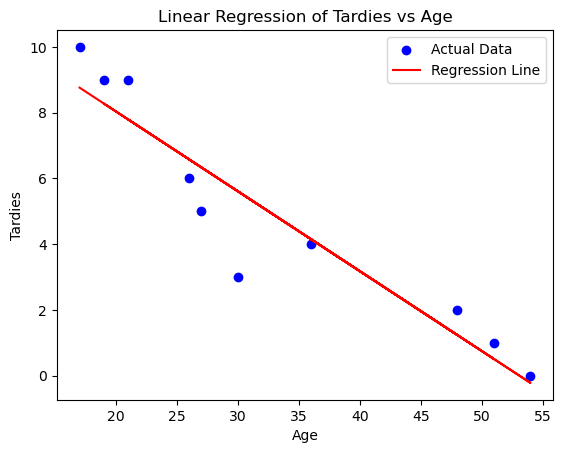

In [26]:
# Your code here.
plt.scatter(x, y, color='blue', label='Actual Data')
plt.plot(x, y_predictions, color='red', label='Regression Line')
plt.title('Linear Regression of Tardies vs Age')
plt.xlabel('Age')
plt.ylabel('Tardies')
plt.legend()
plt.show()

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

*your explanation here*
Based on the results of the model it would seem that age is a good predictor of tardiness in this sample. The variables are closely related.

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [36]:
# Import any libraries you may need & the data
vehicles = pd.read_csv("../vehicles.csv")

In [38]:
vehicles.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [44]:
# Your code here.
# Outcome variable will be CO2 Emissions
# List of variables to calculate correlation with the outcome
variables = ['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year']

# Compute correlations only for the specified variables
correlations = vehicles[variables].corrwith(vehicles['CO2 Emission Grams/Mile'])

print("Correlations with CO2 Emission Grams/Mile:")
print(correlations)

Correlations with CO2 Emission Grams/Mile:
Year                -0.222300
Cylinders            0.752393
Fuel Barrels/Year    0.986189
Combined MPG        -0.926229
Fuel Cost/Year       0.930865
dtype: float64


Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

Mean Squared Error: 271.11965507029964
R² Score: 0.9808734920269122
Intercept: 769.8882836465821
Coefficients: [-0.32061673  1.87879976 19.05292507 -3.04039938  0.03230948]


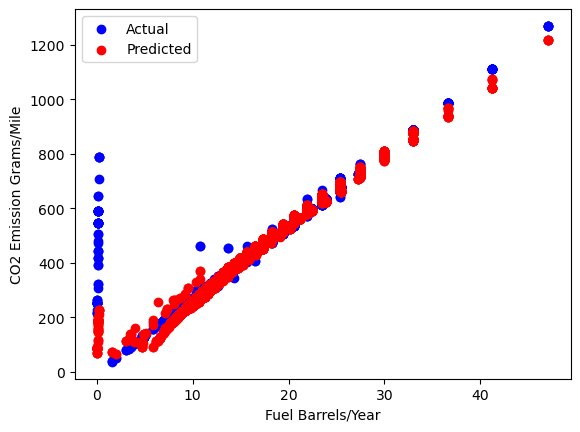

In [50]:
# Your code here.
# From the correlation calculations we find that Fuel Barrels/Year, Combined MPG and Fuelcost/Year
# are strongly related. I will be using linear regression.

# Select predictor variables and outcome variable
X = vehicles[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year']]
y = vehicles['CO2 Emission Grams/Mile']

# Initialize and fit the model
model = LinearRegression()
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

# Evaluate the model
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

# Coefficients and intercept
print(f"Intercept: {model.intercept_}")
print(f"Coefficients: {model.coef_}")

# Visualizing predictions (for a simple 2D case, if you want to focus on one predictor)
plt.scatter(vehicles['Fuel Barrels/Year'], y, color='blue', label='Actual')
plt.scatter(vehicles['Fuel Barrels/Year'], y_pred, color='red', label='Predicted')
plt.xlabel('Fuel Barrels/Year')
plt.ylabel('CO2 Emission Grams/Mile')
plt.legend()
plt.show()

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [54]:
# Your code here.
# Evaluate the model
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

# Coefficients and intercept
print(f"Intercept: {model.intercept_}")
print(f"Coefficients: {model.coef_}")

Mean Squared Error: 271.11965507029964
R² Score: 0.9808734920269122
Intercept: 769.8882836465821
Coefficients: [-0.32061673  1.87879976 19.05292507 -3.04039938  0.03230948]


## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [57]:
# Your code here.
data = pd.DataFrame({'X': [1,3,4,6,8,9,11,14], 'Y': [1,2,4,4,5,7,8,13]})

data.head()

,X,Y
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

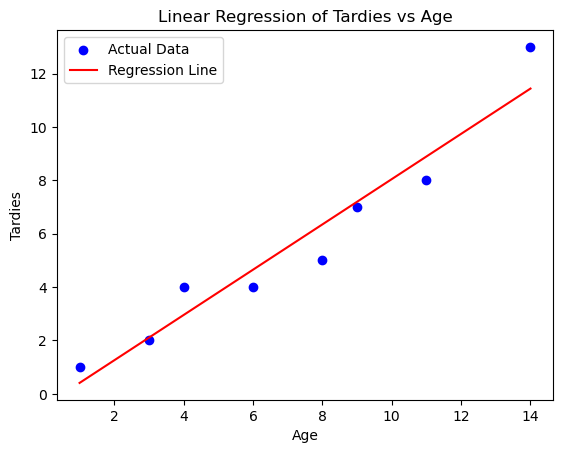

In [63]:
# Your code here.
# Variables
x = data[['X']]
y = data['Y']
# model
model = LinearRegression()
model.fit(x,y)

# model predictions
y_predictions = model.predict(x)



plt.scatter(x, y, color='blue', label='Actual Data')
plt.plot(x, y_predictions, color='red', label='Regression Line')
plt.title('Linear Regression of Tardies vs Age')
plt.xlabel('Age')
plt.ylabel('Tardies')
plt.legend()
plt.show()

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

*your explanation here*

The relationship between the variables is very high, but it does not seem to agree with the problem statement.

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [67]:
# Your response here.

# Evaluate the model
slope = model.coef_[0]
intercept = model.intercept_

# mean squared error
mse = mean_squared_error(y, y_predictions)
r2 = r2_score(y, y_predictions)

print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")


Slope: 0.8484848484848485
Intercept: -0.43939393939393945
Mean Squared Error (MSE): 0.8712121212121214
R² Score: 0.9316696375519905


What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

*your explanation here*

From the previous model it seems that the final data point is pulling the model upwards, this has an impact
on the acuracy of the predictions.